In [15]:
import datetime

import numpy as np
import pandas as pd

import e3psi
from hubbardml import datasets
from hubbardml import graphs
from hubbardml import keys

In [16]:
TIMESTAMP = "2023-07-23_10-38-27"
EXPERIMENTS = (
    "experiment=predict_final,model=u/2023-07-26_09-39-29",
    "experiment=predict_final,model=v/2023-07-26_09-39-29"
)

DATASET = "dataset.json"
COLS = [keys.SC_PATHS, keys.PARAM_TYPE, keys.ATOM_1_ELEMENT, keys.ATOM_1_IDX, keys.ATOM_2_ELEMENT, keys.ATOM_2_IDX_UC, keys.ATOM_2_IDX, keys.PARAM_OUT, keys.PARAM_OUT_PREDICTED, keys.TRAINING_LABEL]

In [17]:
frames = []
for experiment in EXPERIMENTS:
    path = f"outputs/{experiment}/{DATASET}"
    print(path)
    frames.append(pd.read_json(path))

df = pd.concat(frames)
df


outputs/experiment=predict_final,model=u/2023-07-26_09-39-29/dataset.json
outputs/experiment=predict_final,model=v/2023-07-26_09-39-29/dataset.json


,dir,material,is_vdw,uv_iter,formula,cell,n_atoms_uc,person,structure_index,pw_time_unix,...,species,label,colour,sc_paths,param_final,cluster_id,training_label,param_out_predicted,p_element,d_element
0,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,9.6441,1c543a33-20e8-43e9-831b-df69f0b43fe3,train,9.696028,NaN,NaN
78,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,8.5407,1db6c2dd-6920-41f0-b470-6aa26a776082,validate,8.505835,NaN,NaN
118,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,8.5407,1db6c2dd-6920-41f0-b470-6aa26a776082,duplicate,8.505835,NaN,NaN
161,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,8.5407,1db6c2dd-6920-41f0-b470-6aa26a776082,duplicate,8.505835,NaN,NaN
197,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,8.5407,1db6c2dd-6920-41f0-b470-6aa26a776082,duplicate,8.505835,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106816,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,122,1638445240,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,0.8509,5965c8da-5959-406d-86e6-dfa7901baf3d,train,0.850134,O,Mn
106817,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,122,1638445240,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,0.8509,f5bf68f4-8b9a-4a0b-b03d-61f46f8303d9,train,0.849279,O,Mn
106862,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,122,1638445240,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,0.8435,7d488c76-50a3-4b73-ab45-c04be052a182,train,0.840075,O,Mn
106863,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,122,1638445240,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,0.8509,5965c8da-5959-406d-86e6-dfa7901baf3d,train,0.850134,O,Mn


In [18]:
df[keys.SC_PATHS].unique()

array(['/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/b-type',
       '/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/ferro',
       '/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/s-type',
       '/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/t-type',
       '/Users/azadoks/Data/uv_ml/iurii/Layered/2_LixNiO2/1_LiNiO2_DFT_plus_UV_v3',
       '/Users/azadoks/Data/uv_ml/iurii/Layered/2_LixNiO2/1_NiO2_DFT_plus_UV',
       '/Users/azadoks/Data/uv_ml/iurii/Layered/3_LixMnO2/3_LiMnO2_DFT_plus_UV_v3',
       '/Users/azadoks/Data/uv_ml/iurii/Layered/3_LixMnO2/3_MnO2_DFT_plus_UV',
       '/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0.5Mn0.5PO4/A1_Li0.00Mn0.5Fe0.5PO4/DFT_plus_UV',
       '/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFePO4/C1_Li0.00FePO4/DFT_plus_UV',
       '/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFePO4/C2_Li0.25FePO4/DFT_plus_UV',
       '/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFePO4/C3_Li0.50FePO4/DFT_plus_UV',
       '/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFePO4/C4_Li0

In [14]:
li_concentrations = ["0.00", "0.50", "1.00"]
ions = ["Mn", "Fe", "Mn0.5Fe0.5"]

frames = []
for ion in ions:
    for li_concentration in li_concentrations:
        if ion in ("Mn", "Fe") and li_concentration == "0.50":
            continue

        composition = f"Li{li_concentration}{ion}PO4"
        print(f"{composition}: {sum(df[keys.SC_PATHS].str.contains(composition))}")
        frames.append(df[df[keys.SC_PATHS].str.contains(composition) & (df[keys.UV_ITER] == 1)])

subframe = pd.concat(frames)

Li0.00MnPO4: 216
Li1.00MnPO4: 208
Li0.00FePO4: 208
Li1.00FePO4: 156
Li0.00Mn0.5Fe0.5PO4: 156
Li0.50Mn0.5Fe0.5PO4: 0
Li1.00Mn0.5Fe0.5PO4: 0


In [11]:
outs = subframe[COLS].sort_values([keys.SC_PATHS, keys.ATOM_1_IDX, keys.PARAM_TYPE])
outs

,sc_paths,param_type,atom_1_element,atom_1_idx,atom_2_element,atom_2_idx_uc,atom_2_idx,param_out,param_out_predicted,training_label
32563,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,U,Fe,1,Fe,1,1,5.4332,5.776473,validate
32564,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,V,Fe,1,O,9,345,1.1219,1.124132,train
32565,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,V,Fe,1,O,5,5,1.0879,1.108817,train
32566,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,V,Fe,1,O,14,14,0.8008,0.663519,validate
32567,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,V,Fe,1,O,13,277,0.8008,0.663514,duplicate
...,...,...,...,...,...,...,...,...,...,...
64250,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,V,O,18,Mn,1,365,0.4174,0.462314,train
64271,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,V,O,19,Mn,4,312,0.7801,0.673023,train
64272,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,V,O,19,Mn,2,2,0.4174,0.462227,train
64293,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,V,O,20,Mn,4,4,0.7801,0.673023,train


In [12]:

dt_string = datetime.date.today()
outs.to_excel(f"/tmp/uv_dataset_{dt_string}.ods", engine="odf")


In [7]:
subframe


,dir,material,is_vdw,uv_iter,formula,cell,n_atoms_uc,person,structure_index,pw_time_unix,...,species,label,colour,sc_paths,param_final,cluster_id,training_label,param_out_predicted,p_element,d_element
48310,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,B1_Li0.00MnPO4,False,1,,"[18.3958782305, 0.0, 0.0, 0.0, 11.1750611095, ...",24,iurii,89,1594912769,...,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,6.2564,6b54b0cc-1f21-42dd-a12a-fbe02f0504fb,train,6.257326,NaN,NaN
48395,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,B1_Li0.00MnPO4,False,1,,"[18.3958782305, 0.0, 0.0, 0.0, 11.1750611095, ...",24,iurii,89,1594912769,...,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,6.2564,6b54b0cc-1f21-42dd-a12a-fbe02f0504fb,train,6.257326,NaN,NaN
48495,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,B1_Li0.00MnPO4,False,1,,"[18.3958782305, 0.0, 0.0, 0.0, 11.1750611095, ...",24,iurii,89,1594912769,...,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,6.2564,6b54b0cc-1f21-42dd-a12a-fbe02f0504fb,train,6.257326,NaN,NaN
48595,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,B1_Li0.00MnPO4,False,1,,"[18.3958782305, 0.0, 0.0, 0.0, 11.1750611095, ...",24,iurii,89,1594912769,...,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,6.2564,6b54b0cc-1f21-42dd-a12a-fbe02f0504fb,train,6.257326,NaN,NaN
48311,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,B1_Li0.00MnPO4,False,1,,"[18.3958782305, 0.0, 0.0, 0.0, 11.1750611095, ...",24,iurii,89,1594912769,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiMnP...,1.0675,abc8d538-d5a6-473a-90c7-934b729e4011,train,1.081703,O,Mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33286,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,A1_Li0.00Mn0.5Fe0.5PO4,False,1,,"[18.5936265225, -0.0009754750000000001, 0.0072...",24,iurii,68,1618231488,...,"[Fe, O]",Fe-O,#E06633,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,0.5973,e01095b1-dbba-4937-a085-b3fc72134eae,train,0.644458,O,Fe
33307,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,A1_Li0.00Mn0.5Fe0.5PO4,False,1,,"[18.5936265225, -0.0009754750000000001, 0.0072...",24,iurii,68,1618231488,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,0.9164,b1bfd203-c54c-42f6-83a2-ea6ee2e974a3,train,0.937680,O,Mn
33308,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,A1_Li0.00Mn0.5Fe0.5PO4,False,1,,"[18.5936265225, -0.0009754750000000001, 0.0072...",24,iurii,68,1618231488,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,0.5528,547abdba-211b-4ee7-a07f-93b1ee7ae74b,train,0.584834,O,Mn
33329,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,A1_Li0.00Mn0.5Fe0.5PO4,False,1,,"[18.5936265225, -0.0009754750000000001, 0.0072...",24,iurii,68,1618231488,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFe0...,0.9167,b1bfd203-c54c-42f6-83a2-ea6ee2e974a3,train,0.934387,O,Mn


In [37]:
outs[outs[keys.SC_PATHS].str.contains("Li1.00FePO4") ]


,sc_paths,param_type,atom_1_element,atom_1_idx,atom_2_element,atom_2_idx_uc,atom_2_idx,param_out,param_out_predicted,training_label
46275,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,U,Fe,1,Fe,1,1,5.2907,5.333199,train
46276,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,V,Fe,1,O,14,14,0.8953,0.902766,train
46277,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,V,Fe,1,O,13,321,0.8953,0.902766,train
46278,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,V,Fe,1,O,9,401,0.7813,0.790559,train
46279,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,V,Fe,1,O,5,5,0.5537,0.540007,validate
46280,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,V,Fe,1,O,18,410,0.4172,0.417728,train
46281,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,V,Fe,1,O,17,409,0.4172,0.417728,train
46360,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,U,Fe,2,Fe,2,2,5.2902,5.298331,train
46361,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,V,Fe,2,O,16,16,0.8957,0.915291,train
46362,/Users/azadoks/Data/uv_ml/iurii/Olivines/LiFeP...,V,Fe,2,O,15,323,0.8957,0.915291,train


In [9]:
two_sites = subframe[
    subframe[keys.SC_PATHS].str.contains("Li1.00MnPO4") &\
    (subframe[keys.ATOM_1_IDX].isin([1, 3]))  &\
    subframe[keys.ATOM_2_IDX].isin([1, 3]) & \
    (subframe[keys.PARAM_TYPE] == "U")
]
two_sites[keys.PARAM_OUT_PREDICTED]

63637    4.562446
63822    4.562446
Name: param_out_predicted, dtype: float64

In [10]:
site1 = two_sites.iloc[0]
site2 = two_sites.iloc[1]


In [11]:
for col in [keys.PARAM_IN, keys.ATOM_1_OCCS_1, keys.ATOM_1_OCCS_2, keys.ATOM_2_OCCS_1, keys.ATOM_2_OCCS_2, keys.DIST_IN, keys.DIST_OUT]:

    val1 = np.array(site1[col])
    val2 = np.array(site2[col])
    print(f"Diff {col}:\n{val2 - val1}")


Diff param_in:
0.0
Diff atom_1_occs_1:
[[-0.96  -0.001  0.     0.01   0.   ]
 [-0.001 -0.909  0.     0.03   0.   ]
 [ 0.     0.    -0.917  0.    -0.029]
 [ 0.01   0.03   0.    -0.91   0.   ]
 [ 0.     0.    -0.029  0.    -0.925]]
Diff atom_1_occs_2:
[[ 0.96  -0.001  0.    -0.01   0.   ]
 [-0.001  0.909  0.     0.03   0.   ]
 [ 0.     0.     0.917  0.    -0.029]
 [-0.01   0.03   0.     0.91   0.   ]
 [ 0.     0.    -0.029  0.     0.925]]
Diff atom_2_occs_1:
[[-0.96  -0.001  0.     0.01   0.   ]
 [-0.001 -0.909  0.     0.03   0.   ]
 [ 0.     0.    -0.917  0.    -0.029]
 [ 0.01   0.03   0.    -0.91   0.   ]
 [ 0.     0.    -0.029  0.    -0.925]]
Diff atom_2_occs_2:
[[ 0.96  -0.001  0.    -0.01   0.   ]
 [-0.001  0.909  0.     0.03   0.   ]
 [ 0.     0.     0.917  0.    -0.029]
 [-0.01   0.03   0.     0.91   0.   ]
 [ 0.     0.    -0.029  0.     0.925]]
Diff dist_bohr_in:
0.0
Diff dist_bohr_out:
0.0


In [12]:
## Check similarities

In [13]:
subframe[
    (subframe["d_element"] == "Mn") & \
    (subframe["p_element"] == "O")
][[keys.ATOM_1_IDX, keys.ATOM_2_IDX, keys.PARAM_OUT, keys.PARAM_TYPE, keys.PARAM_OUT_PREDICTED, keys.DIST_IN]]


,atom_1_idx,atom_2_idx,param_out,param_type,param_out_predicted,dist_bohr_in
48311,1,5,1.0675,V,1.081703,3.495442
48312,1,345,1.0716,V,1.097874,3.515624
48313,1,277,0.9087,V,0.924753,3.698725
48314,1,14,0.9087,V,0.924753,3.698725
48315,1,352,0.5350,V,0.546376,4.394293
...,...,...,...,...,...,...
33242,16,340,0.5507,V,0.579224,4.400829
33307,19,268,0.9164,V,0.937680,3.745574
33308,19,3,0.5528,V,0.584834,4.395477
33329,20,4,0.9167,V,0.934387,3.743521


In [14]:
for param_out in subframe[keys.PARAM_OUT].unique():
    matching = subframe[subframe[keys.PARAM_OUT] == param_out]
    print(param_out, matching[keys.PARAM_OUT_PREDICTED])

6.2564 48310    6.257326
48395    6.257326
48495    6.257326
48595    6.257326
Name: param_out_predicted, dtype: float64
1.0675 48311    1.081703
48496    1.081692
48680    1.081703
48714    1.081692
Name: param_out_predicted, dtype: float64
1.0716 48312    1.097874
48397    1.097867
48497    1.097873
48597    1.097866
48748    1.097874
48764    1.097866
48780    1.097873
48796    1.097867
Name: param_out_predicted, dtype: float64
0.9087000000000001 48313    0.924753
48314    0.924753
48398    0.924861
48399    0.924861
48498    0.924741
48499    0.924741
48598    0.924843
48599    0.924843
48812    0.924753
48834    0.924753
48856    0.924741
48878    0.924741
48900    0.924861
48922    0.924861
48944    0.924843
48966    0.924843
Name: param_out_predicted, dtype: float64
0.535 48315    0.546376
48316    0.546376
48500    0.546413
48501    0.546413
48813    0.546413
48835    0.546413
48857    0.546376
48879    0.546376
Name: param_out_predicted, dtype: float64
0.11270000000000001 4832

In [15]:
fr = subframe[subframe[keys.PARAM_OUT] == subframe[keys.PARAM_OUT].unique()[0]][
    [keys.PARAM_TYPE, keys.ATOM_1_IDX, keys.PARAM_IN, keys.PARAM_OUT, keys.PARAM_OUT_PREDICTED, keys.ATOM_1_OCCS_1, keys.ATOM_1_OCCS_2]
]
fr

,param_type,atom_1_idx,param_in,param_out,param_out_predicted,atom_1_occs_1,atom_1_occs_2
48310,U,1,0.0,6.2564,6.257326,"[[0.985, 0.031, 0.0, -0.042, 0.0], [0.031, 0.7...","[[0.098, -0.009000000000000001, 0.0, 0.019, 0...."
48395,U,2,0.0,6.2564,6.257326,"[[0.985, -0.031, 0.0, -0.042, 0.0], [-0.031, 0...","[[0.098, 0.009000000000000001, 0.0, 0.019, 0.0..."
48495,U,3,0.0,6.2564,6.257326,"[[0.098, 0.009000000000000001, 0.0, 0.019, 0.0...","[[0.985, -0.031, 0.0, -0.042, 0.0], [-0.031, 0..."
48595,U,4,0.0,6.2564,6.257326,"[[0.098, -0.009000000000000001, 0.0, 0.019, 0....","[[0.985, 0.031, 0.0, -0.042, 0.0], [0.031, 0.7..."


In [16]:
np.array(fr.loc[48310][keys.ATOM_1_OCCS_1])

array([[ 0.985,  0.031,  0.   , -0.042,  0.   ],
       [ 0.031,  0.745,  0.   ,  0.278,  0.   ],
       [ 0.   ,  0.   ,  0.984,  0.   , -0.006],
       [-0.042,  0.278,  0.   ,  0.672,  0.   ],
       [ 0.   ,  0.   , -0.006,  0.   ,  0.988]])

In [17]:
np.array(fr.loc[48310][keys.ATOM_1_OCCS_2])


array([[ 0.098, -0.009,  0.   ,  0.019,  0.   ],
       [-0.009,  0.175,  0.   , -0.082,  0.   ],
       [ 0.   ,  0.   ,  0.133,  0.   ,  0.007],
       [ 0.019, -0.082,  0.   ,  0.188,  0.   ],
       [ 0.   ,  0.   ,  0.007,  0.   ,  0.153]])

In [18]:
abs(np.array(fr.loc[48310][keys.ATOM_1_OCCS_1])) + abs(np.array(fr.loc[48310][keys.ATOM_1_OCCS_2]))

array([[1.083, 0.04 , 0.   , 0.061, 0.   ],
       [0.04 , 0.92 , 0.   , 0.36 , 0.   ],
       [0.   , 0.   , 1.117, 0.   , 0.013],
       [0.061, 0.36 , 0.   , 0.86 , 0.   ],
       [0.   , 0.   , 0.013, 0.   , 1.141]])

In [19]:
np.array(fr.loc[48495][keys.ATOM_1_OCCS_1])


array([[ 0.098,  0.009,  0.   ,  0.019,  0.   ],
       [ 0.009,  0.175,  0.   ,  0.082,  0.   ],
       [ 0.   ,  0.   ,  0.133,  0.   , -0.007],
       [ 0.019,  0.082,  0.   ,  0.188,  0.   ],
       [ 0.   ,  0.   , -0.007,  0.   ,  0.153]])

In [20]:
np.array(fr.loc[48495][keys.ATOM_1_OCCS_2])


array([[ 0.985, -0.031,  0.   , -0.042,  0.   ],
       [-0.031,  0.745,  0.   , -0.278,  0.   ],
       [ 0.   ,  0.   ,  0.984,  0.   ,  0.006],
       [-0.042, -0.278,  0.   ,  0.672,  0.   ],
       [ 0.   ,  0.   ,  0.006,  0.   ,  0.988]])

In [21]:
abs(np.array(fr.loc[48495][keys.ATOM_1_OCCS_1])) + abs(np.array(fr.loc[48495][keys.ATOM_1_OCCS_2]))


array([[1.083, 0.04 , 0.   , 0.061, 0.   ],
       [0.04 , 0.92 , 0.   , 0.36 , 0.   ],
       [0.   , 0.   , 1.117, 0.   , 0.013],
       [0.061, 0.36 , 0.   , 0.86 , 0.   ],
       [0.   , 0.   , 0.013, 0.   , 1.141]])

In [22]:
abs(np.array(fr.loc[48310][keys.ATOM_1_OCCS_1])) + abs(np.array(fr.loc[48310][keys.ATOM_1_OCCS_2])) - (abs(np.array(fr.loc[48495][keys.ATOM_1_OCCS_1])) + abs(np.array(fr.loc[48495][keys.ATOM_1_OCCS_2])))


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [23]:
np.multiply(abs(np.array(fr.loc[48310][keys.ATOM_1_OCCS_1])), abs(np.array(fr.loc[48310][keys.ATOM_1_OCCS_2]))) - np.multiply(abs(np.array(fr.loc[48495][keys.ATOM_1_OCCS_1])), abs(np.array(fr.loc[48495][keys.ATOM_1_OCCS_2])))


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [24]:
graph = graphs.UGraph(["Mn", "Fe", "Ni"])
row1 = graph.create_inputs(subframe.loc[48310])
row2 = graph.create_inputs(subframe.loc[48495])


/home/martin/.local/miniconda3/envs/dftuv/lib/python3.10/site-packages/torch/jit/_check.py:172: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn("The TorchScript type system doesn't support "


In [25]:
(row1['site'] - row2['site']).abs().max()


tensor(3.7253e-09, dtype=torch.float64)

In [26]:
row = subframe.loc[48310]
inp1 = graph.site.create_inputs(
    row[keys.ATOM_1_ELEMENT],
    *datasets.get_occupation_matrices(row, 1),
    row[keys.PARAM_IN],
)
row = subframe.loc[48495]
inp2 = graph.site.create_inputs(
    row[keys.ATOM_1_ELEMENT],
    *datasets.get_occupation_matrices(row, 1),
    row[keys.PARAM_IN],
)

In [27]:
(inp1['occs_prod'] - inp2['occs_prod']).abs().max()


tensor(3.7253e-09)

In [28]:
(inp1['occs_sum'] - inp2['occs_sum']).abs().max()


tensor(0.)

In [29]:
(graph.site.occs_prod.create_tensor(
    list(map(np.abs, [np.array(fr.loc[48310][keys.ATOM_1_OCCS_1]), np.array(fr.loc[48310][keys.ATOM_1_OCCS_2])]))
) -\
graph.site.occs_prod.create_tensor(
    list(map(np.abs, [np.array(fr.loc[48495][keys.ATOM_1_OCCS_1]), np.array(fr.loc[48495][keys.ATOM_1_OCCS_2])]))
)).abs() > 1e-4


tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False])

In [30]:
graph.site.occs_prod.create_tensor(
    list(map(np.abs, [np.array(fr.loc[48495][keys.ATOM_1_OCCS_1]), np.array(fr.loc[48495][keys.ATOM_1_OCCS_2])]))
)


tensor([ 6.5348e-01,  3.4508e-02,  4.0212e-03,  4.4788e-03, -2.8955e-02,
         7.1872e-03,  9.0804e-04, -4.0418e-03,  2.9660e-03, -1.3035e-03,
        -3.0401e-03, -2.9141e-03, -2.5372e-03, -1.2797e-03, -6.5471e-03,
        -2.2958e-02,  4.2597e-02, -6.5062e-03,  2.1819e-03, -4.3390e-03,
         6.6587e-03, -7.9564e-03,  1.2585e-03, -5.6764e-03, -2.0653e-02,
         1.3265e-03, -3.5578e-02,  1.5277e-03, -5.5412e-03,  3.1104e-03,
        -2.2849e-02, -1.1870e-02, -2.3436e-03,  9.4177e-04, -3.5147e-03,
         6.6554e-03, -7.4064e-03, -4.4866e-02, -1.0892e-02,  3.6037e-04,
         2.4574e-03, -3.9040e-02, -4.7543e-03,  5.3451e-04,  0.0000e+00,
         1.8267e-03,  7.6661e-03, -5.6427e-03,  1.0714e-03,  3.6938e-04,
         8.8637e-03,  9.5188e-04, -3.6652e-03,  3.6531e-03,  5.5252e-03,
         2.6111e-03, -2.1872e-02, -9.4447e-03, -1.5341e-03, -1.3367e-03,
         1.2733e-04])

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

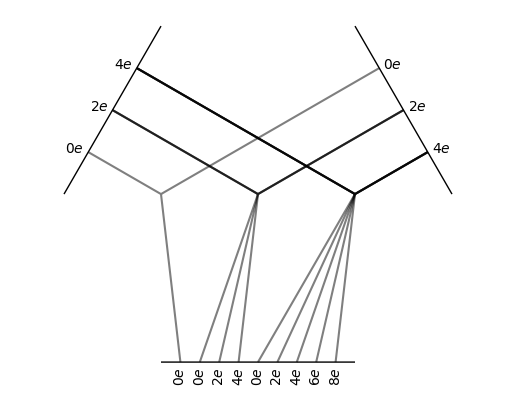

In [31]:
graph.site.occs_prod._tp.visualize()


In [32]:
from e3nn import o3


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

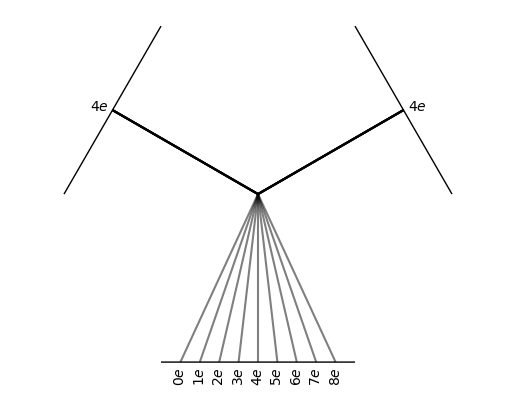

In [33]:
irps = o3.Irreps('4e')
o3.FullTensorProduct(irps, irps).visualize()


In [34]:
df[df[keys.PARAM_IN] == 0.]


,dir,material,is_vdw,uv_iter,formula,cell,n_atoms_uc,person,structure_index,pw_time_unix,...,species,label,colour,sc_paths,param_final,cluster_id,training_label,param_out_predicted,p_element,d_element
0,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,9.6441,1c543a33-20e8-43e9-831b-df69f0b43fe3,train,9.696028,NaN,NaN
78,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,8.5407,1db6c2dd-6920-41f0-b470-6aa26a776082,validate,8.505835,NaN,NaN
118,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,8.5407,1db6c2dd-6920-41f0-b470-6aa26a776082,duplicate,8.505835,NaN,NaN
161,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,8.5407,1db6c2dd-6920-41f0-b470-6aa26a776082,duplicate,8.505835,NaN,NaN
197,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,8.5407,1db6c2dd-6920-41f0-b470-6aa26a776082,duplicate,8.505835,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106361,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,122,1638445240,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,0.1693,bde5b107-1127-4d01-806b-4eaf0c0a7d79,duplicate,0.148060,O,Mn
106487,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,122,1638445240,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,0.1511,bde5b107-1127-4d01-806b-4eaf0c0a7d79,duplicate,0.148362,O,Mn
106563,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,122,1638445240,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,0.1655,05f5a831-aa50-4007-8cc7-ad1f03a88c26,train,0.157257,O,Mn
106564,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,122,1638445240,...,"[Mn, O]",Mn-O,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,0.1645,05f5a831-aa50-4007-8cc7-ad1f03a88c26,train,0.156744,O,Mn
